# Arbre de décision

L'arbre de décision, est un algorithme d'apprentissage \textbf{supervisé} utilisé pour des tâches de classification (variable cible catégorielle) et de régression (valeur cible réelle).

Il permet de construire une série de règles explicites à partir des données explicatives, en fonction de la variable cible qu'on cherche à expliquer.

**Les algorithmes de l'arbre de décision:**

Plusieurs algorithmes d'arbres de décision ont été développés:

1- **ID3**:
ID3 (Iterative Dichotomiser 3) a été développé en 1986 par Ross Quinlan. L'algorithme crée un arbre à plusieurs branches (ID3 divise les observations en deux groupes ou plus à chaque étape) et à chaque itération, il sélectionne la caractéristique ayant la plus petite entropie pour diviser les données.
Généralement, ID3 est utilisé uniquement pour des problèmes de classification avec des caractéristiques nominales/catégorielles uniquement.

2- **C4.5**:
La contrainte sur le type des variables explicatives représente une limitation de l'algorithme ID3. En outre, il est incapable de gérer les valeurs manquantes, et a tendance à causer le surapprentissage. Ross Quinlan, l'inventeur de ID3, a amélioré ID3 et a créé un nouvel algorithme, qui est le C4.5. Les améliorations apportées sont les suivantes:
- Capacité de gérer les attributs discrets **et** continus.
- Capacité de gérer les valeurs manquantes, elles ne sont tout simplement pas utilisées dans les calculs de gain d'information et d'entropie.
- Élagage des arbres après leur création, ce qui permet d'atténuer le surapprentissage.
    
La limitation de C4.5 est qu'il est utilisé que pour les cas de classification. 

3- **CART**:
CART (Classification and Regression Trees), est l'algorithme utilisé pour construire des arbres de décision dans la bibliothèque scikit-learn en Python. Il peut être utilisé pour des cas de classification ou regression. 

Cet algorithme cré des arbres de décision binaires: les noeuds parents sont toujours divisés en exactement deux noeuds enfants. (Dans la bibliothèque scikit-learn de Python, l'algorithme implémenté pour les arbres de décision est CART). Au contraire de ID3 et C4.5 qui utilisent l'entropie pour choisir la meilleur variable, CART peut aussi utiliser l'indice de Gini.

Les étapes de l'arbre de décision sont les suivantes:
- L'algorithme considère toutes les observations disponibles dans le noeud racine.

- L'algorithme d'arbre de décision évalue toutes les variables en utilisant des métriques telles que Gini ou entropie pour choisir celle qui divise les données en maximisant la réduction de l'impureté.

- Les données d'entraînement sont divisées en sous-ensembles en se basant sur la caractéristique choisie. Ces divisions s'appliquent aux nœuds internes de l'arbre, tandis que les décisions finales sont prises au niveau des nœuds feuilles.

- L'étape précédente est répétée pour chaque sous-ensemble de données créé. Cela entraîne une construction récursive de l'arbre jusqu'à ce que toutes les instances soient classées ou que certains critères d'arrêt soient atteints.



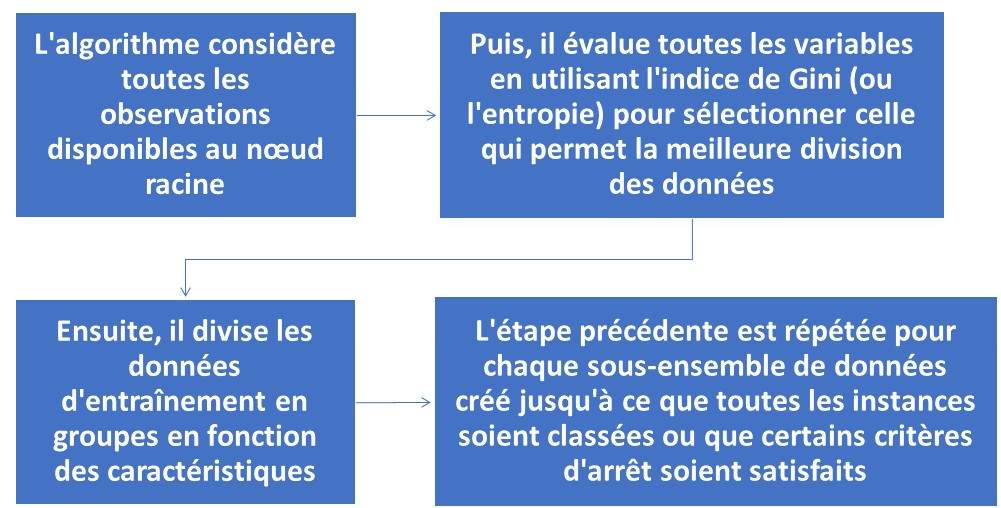

In [9]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/dt etapes.jpg"
width = 600
height = 600
Image(filename=image_path, width=width, height=height)

Une fois que l'arbre de décision est construit, il peut être utilisé pour guider la prédiction d'un nouvel exemple en suivant un chemin de la racine à une feuille, où la classe est déterminée par vote majoritaire ou une distribution de probabilité. Le seuil par défaut de 50\% est utilisé pour prédire la classe 1 si la probabilité dépasse ce seuil, sinon, la classe 0 est prédite en cas de classification binaire.


# Pré-Élagage
Le surapprentissage représente un défis majeur dans la modélisation des arbres de décision. Il se produit lorsque la taille de l'arbre n'est pas limitée, ce qui peut entraîner une précision de 100\% sur l'ensemble d'entraînement. %En effet, l'arbre continuera à croître jusqu'à ce qu'il crée une feuille pour chaque observation, ce qui empêche la généralisation du modèle. 
Afin de prévenir le surapprentissage, il est crucial de définir des critères qui contrôlent la croissance de l'arbre pendant sa construction, ce qui est le pré-élagage. Il faut donc chercher la meilleure combinaison de ces critères \cite{PP}.

Les plus importants hyperparamètres à optimiser sont la profondeur de l'arbre, le nombre minimum d'échantillons requis pour diviser un nœud, le nombre minimum d'échantillons requis pour qu'un nœud soit une feuille, le seuil minimum de réduction de l'impureté requis pour diviser un nœud, et le paramètre de l'algorithme de post-élagage qui sera expliqué dans la partie qui suit.

| Hyperparamètre       | Description                                                                                                             |
|----------------------|-------------------------------------------------------------------------------------------------------------------------|
| max\_depth           | Limite la profondeur de l'arbre.                                                                                       |
| min\_samples\_split  | Le nombre minimum d'échantillons requis pour diviser un nœud. Des valeurs plus élevées limitent la                              capacité du modèle à capturer des relations très spécifiques à l'échantillon, réduisant ainsi le risque                          de surapprentissage, mais elles peuvent aussi augmenter le risque de sous-apprentissage en limitant la                          complexité du modèle. |
| max\_features        | Le nombre maximum de variables considérées pour chaque division (par défaut, toutes les variables).                     |
| min\_samples\_leaf   | Le nombre minimum d'échantillons requis pour qu'un nœud soit une feuille.                                                |
| Criterion            | La mesure de qualité de la division (Gini ou Entropie).                                                                  |
| max\_leaf\_nodes     | Le nombre maximum de noeuds terminaux dans l'arbre.                                                                   |
| min\_impurity\_decrease | Contrôle la croissance de l'arbre en spécifiant le seuil minimum de réduction de l'impureté requis pour diviser un nœud. Une valeur élevée limitera la croissance de l'arbre et évitera le surapprentissage, mais cela peut également entraîner une perte de précision. |
| ccp\_alpha           | Paramètre de l'algorithme de post-élagage. C'est le $\alpha$ maximal de l'algorithme du post-élagage expliqué ci-dessous   |


# Post-Élagage
Le post-élagage est une méthode employée afin de minimiser le surapprentissage d'un arbre de décision en éliminant des branches non pertinentes.

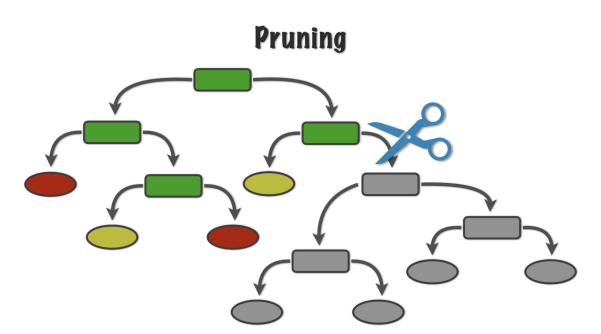

In [13]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/pruning.png"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

Il existe plusieurs méthodes d'élagage, et nous allons explorer la méthode "cost-complexity-pruning", qui est paramétrée par $\alpha$. Dans Scikit-learn, cette méthode est intégrée en tant qu'hyperparamètre de l'algorithme de l'arbre de décision, sous le nom de $ccp\_alpha$ \cite{AB}.

Il est essentiel de déterminer quelles branches de l'arbre doivent être supprimées. Le taux d'erreur de classification R(T) ne constitue pas une mesure appropriée pour la sélection d'un sous-arbre, car il favorisera à conserver les arbres les plus profondes qui auront un taux d'erreur moins élevé sur les données d'entraînement (et un taux d'erreur plus élevé sur les données de test), vu qu'ils divisent les données plus et ainsi apprennent plus. Pour cela, une pénalité de complexité est ajoutée à ce taux d'erreur, on introduit ainsi la mesure de complexité pour un arbre T :
    $R_\alpha(T) = R(T) + \alpha |T|$


où R(T) représente la somme des taux d'erreurs de classification des noeuds terminaux de l'arbre T, et $|T|$ désigne le nombre de noeuds terminaux dans T. Plus ce nombre est élevé, plus l'arbre est complexe. 

Le sous-arbre sélectionné dépend de $\alpha$. Si  $\alpha$ =0 , alors le plus grand arbre sera choisi car le terme de pénalité de complexité est essentiellement supprimé. Lorsque  $\alpha$ approche l'infini, l'arbre de taille 1 (le plus petit), c'est-à-dire le noeud racine sera sélectionné.\\
Donc, l'objectif est de réduire la complexité de l'arbre en identifiant le sous-arbre $T_t$ qui, s'il est élagué, apportera la plus grande réduction de complexité. Cependant, nous ne voulons pas seulement réduire la complexité de l'arbre de manière arbitraire. Nous voulons nous assurer que la performance du modèle n'est pas trop affectée par l'élagage et **chercher la plus petite augmentation d'erreur sur les données d'entrainements et diminution d'erreur sur les données de test.** Il faut donc trouver le sous-arbre $T_t$ qui, lorsqu'il est élagué, offre le meilleur équilibre entre la réduction de la complexité et la préservation de la performance du modèle. Pour cela, on cherche à minimiser la variation de la mesure de complexité, $R_{\alpha}(T - T_t) - R_{\alpha}(T)$.

\begin{align*}
R_\alpha(T - T_t) - R_\alpha(T) &= R(T - T_t) + \alpha|T - T_t| - (R(T) + \alpha|T|) \\
&= R(T - T_t) - R(T) + \alpha(|T - T_t| - |T|) \\
&= R(T) - R(T_t) + R(t) - R(T)+ \alpha(|T| - |T_t| + 1 - |T|) \\
&= R(t) - R(T_t) + \alpha(1 - |T_t|)\\
R_\alpha(T - T_t) - R_\alpha(T) &= 0 \iff 
\alpha = \frac{R(t) - R(T_t)}{|T_t| - 1}
\end{align*}


Donc minimiser la variation de complexité revient à minimiser la fonction $ \frac{R(t) - R(T_t)}{|T_t| - 1}$.

Alors, en commençant par l'arbre complet, l'algorithme passe par les étapes suivantes : 

**Algorithme d'élagage**

1. **Initialisation:**
   - Soit $T^1$ l'arbre complet obtenu avec $\alpha^1=0$

2. **Étape 1:**
   - Sélectionner le nœud $t\in T^1$ qui minimise $g_1(t) = \frac{R(t) - R(T^1_{t})}{|T^1_{t}| - 1}$
   - Soit $t_1$ ce nœud
   - Soit $\alpha^2 = g_1(t_1)$ et $T^2 = T^1 - T^1_{t_1}$

3. **Étape i:**
   - Sélectionner le nœud $t\in T^i$ qui minimise $g_i(t) = \frac{R(t) - R(T^i_{t})}{|T^i_{t}| - 1}$
   - Soit $t_i$ ce nœud
   - Soit $\alpha^{i+1} = g_i(t_i)$ et $T^{i+1} = T^i - T^i_{t_i}$

4. **Sortie:**
   - Une séquence d'arbres $T_1 \supseteq T_2 \supseteq \ldots \supseteq T_k \supseteq$ nœud racine
   - Une séquence de paramètres $\alpha_1 \leq \alpha_2 \leq  \leq \alpha_k \leq ...$


Le processus se répète itérativement jusqu'à ce que la valeur maximale de $\alpha$ soit atteinte, lorsque celle-ci est définie, ou jusqu'à ce qu'un autre critère d'arrêt soit spécifié. Pour chaque valeur de $\alpha$ envisagée, l'algorithme entraîne l'arbre correspondant et évalue sa performance à l'aide de la validation croisée. En fin de compte, l'alpha qui conduit à la meilleure performance prédictive est sélectionné comme paramètre optimal.


# Avantages et inconvénients de l'arbre de décision

| Avantages de l'arbre de décision                                             | Inconvénients de l'arbre de décision                               |
|-----------------------------------------------------------------------------|-----------------------------------------------------------------|
| Faciles à interpréter en suivant le chemin des divisions de l'arbre.        | Sensible aux fluctuations des données, ce qui peut causer des structures d'arbre instables.         |
| Adapté à la classification (variables discrètes et catégorielles) et à la régression (variables continues et variables de comptage).   | Tendance à surajuster avec des structures complexes.   |
| Traite les variables numériques et catégorielles.                           | Nécessité d'encoder les variables catégorielles en numérique.   |
| Approche non paramétrique : aucune hypothèse préalable sur la distribution des variables explicatives. | Requiert l'identification et la suppression de variables redondantes pour de meilleures performances.  |


# Arbre de décision avec Scikit-Learn

**La base de données**

La base de données utilisée est Titanic de python. Elle contient des informations sur les passagers du célèbre navire Titanic, y compris des détails tels que leur âge, leur sexe, leur classe de billet, leur port d'embarquement, et s'ils ont survécu ou non au naufrage.

In [1]:
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('titanic')
df = pd.DataFrame(df)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


On considérera pas toutes les variables. On prendra les suivantes : 
- **Variables explicatives:** "pclass", "sex", "age", "fare", "class" 

- **Variable cible:** "survived"

In [3]:
df = df[["pclass", "sex", "age", "fare", "class" ,"survived"]]
df

,pclass,sex,age,fare,class,survived
0,3,male,22.0,7.2500,Third,0
1,1,female,38.0,71.2833,First,1
2,3,female,26.0,7.9250,Third,1
3,1,female,35.0,53.1000,First,1
4,3,male,35.0,8.0500,Third,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,Second,0
887,1,female,19.0,30.0000,First,1
888,3,female,NaN,23.4500,Third,0
889,1,male,26.0,30.0000,First,1


# Imputation des valeurs manquantes

In [4]:
df.isnull().sum()

pclass        0
sex           0
age         177
fare          0
class         0
survived      0
dtype: int64

La variable 'age' contient 177 valeurs manquantes. On choisit de les imputer par la médiane, car elle est moins sensible aux valeurs aberrantes.

In [5]:
df['age'] = df['age'].fillna(df['age'].median())

In [6]:
df.isnull().sum().sum()

0

# Encodage des variables catégorielles

L'encodage des variables catégorielles est une étape importante dans la préparation des données pour l'analyse et l'apprentissage automatique. Il existe plusieurs techniques d'encodage pour les variables catégorielles, le choix de la technique dépend de la nature de la variable. 

La variable "sex" est une variable catégorielle binaire, c'est-à-dire qu'elle a seulement deux catégories possibles, généralement "Homme" et "Femme". L'encodage binaire est approprié pour ce type de variable, car il convertit les catégories en valeurs binaires (0 ou 1), ce qui est pertinent pour de nombreux algorithmes d'apprentissage automatique.

 La variable "class" est une variable catégorielle ordonnée. Les catégories ont un ordre naturel, car la première classe est généralement considérée comme de plus haut rang que la deuxième classe, et ainsi de suite. Dans de tels cas, l'encodage ordinal est approprié, car il attribue des valeurs numériques en conservant cet ordre.

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder

#sex
lb = LabelBinarizer()
df["sex"] = lb.fit_transform(df["sex"])

#class
ordinal_encoder = OrdinalEncoder()
df[["class"]] = ordinal_encoder.fit_transform(df[["class"]])

In [8]:
df.describe()

,pclass,sex,age,fare,class,survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.361582,32.204208,1.308642,0.383838
std,0.836071,0.477990,13.019697,49.693429,0.836071,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,7.910400,1.000000,0.000000
50%,3.000000,1.000000,28.000000,14.454200,2.000000,0.000000
75%,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,512.329200,2.000000,1.000000


In [9]:
X = df.drop('survived', axis=1)
y = df[["survived"]]

# Division des données en 30% données de test et 70% données d'entraînement 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle et prédiction sur les données de test

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)

#fitting
model = model.fit(X_train,y_train)

#predicting
y_pred = model.predict(X_test)

# Optimisation des hyperparamètres du modèle

Les hyperparamètres sont les paramètres du modèle qui ne sont pas appris à partir des données, mais qui doivent être réglés manuellement. L'optimisation des hyperparamètres est une étape cruciale dans la création de modèles d'apprentissage automatique performants. 

Deux méthodes couramment utilisées pour optimiser les hyperparamètres sont la recherche en grille (Grid Search) et la recherche aléatoire (Random Search).

1. **Recherche en grille (Grid Search) :**

La recherche en grille est une méthode systématique d'optimisation des hyperparamètres qui consiste à spécifier un ensemble discret de valeurs possibles pour chaque hyperparamètre. Ensuite, le processus évalue le modèle pour toutes les combinaisons possibles de ces valeurs, en utilisant une validation croisée pour évaluer les performances du modèle sur différents ensembles de données d'entraînement et de test.

**Avantages de la recherche en grille :**

Elle est exhaustive et garantit que toutes les combinaisons possibles des hyperparamètres sont testées.
Elle fournit une solution optimale dans l'ensemble de l'espace des hyperparamètres.
Inconvénients de la recherche en grille :

**Inconvénients de la recherche aléatoire :**

Elle peut être coûteuse en termes de temps de calcul, surtout si l'espace des hyperparamètres est grand.
Elle peut ne pas être efficace si certains hyperparamètres sont moins importants que d'autres.

2. **Recherche aléatoire (Random Search) :**

La recherche aléatoire est une méthode d'optimisation des hyperparamètres qui, comme son nom l'indique, explore de manière aléatoire l'espace des hyperparamètres en sélectionnant des valeurs de manière aléatoire. Contrairement à la recherche en grille, qui teste toutes les combinaisons, la recherche aléatoire échantillonne un nombre fixe de points de manière aléatoire dans l'espace des hyperparamètres.

**Avantages de la recherche aléatoire :**

Elle est plus efficace en termes de temps de calcul par rapport à la recherche en grille, car elle ne teste qu'un échantillon aléatoire des combinaisons d'hyperparamètres.
Elle peut être plus efficace pour les modèles où certains hyperparamètres sont plus importants que d'autres.

**Inconvénients de la recherche aléatoire :**

Il n'y a aucune garantie de trouver la meilleure combinaison d'hyperparamètres, car elle explore de manière aléatoire.
Elle peut être moins précise que la recherche en grille si la taille de l'échantillon est petite.

Dans le cadre de l'optimisation des hyperparamètres d'un modèle d'apprentissage automatique à l'aide de scikit-learn, il est essentiel de choisir la métrique appropriée à votre tâche. La spécification de la métrique est cruciale car elle détermine la manière dont la recherche en grille ou la recherche aléatoire évalue et optimise le modèle. Par exemple, en utilisant le paramètre scoring avec la valeur 'f1', la recherche doit maximiser le score F1, une métrique couramment utilisée pour les problèmes de classification. Toutefois, vous avez la liberté de choisir d'autres métriques telles que la précision, le rappel, l'aire sous la courbe ROC (ROC-AUC), etc., en fonction des objectifs de la tâche.

In [13]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [5, 10, 15, 20, 50],
    'min_samples_leaf': [5, 10, 15, 20, 50],
    'max_leaf_nodes': [10, 20, 30, 40, 50, 80],  
    'min_impurity_decrease': [0.0, 0.01, 0.1, 1.0],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0] 
}



model = DecisionTreeClassifier()
search = RandomizedSearchCV(model, param_grid, scoring='f1', cv=5, n_iter=400)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=400,
                   param_distributions={'ccp_alpha': [0.0, 0.001, 0.01, 0.1,
                                                      1.0],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50,
                                                           80],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.1, 1.0],
                                        'min_samples_leaf': [5, 10, 15, 20, 50],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              50]},
                   scoring='f1')

**Le modèle optimal est alors:**

In [15]:
search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=4,
                       max_leaf_nodes=10, min_impurity_decrease=0.01,
                       min_samples_leaf=15, min_samples_split=10)

In [16]:
model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=4,
                       max_leaf_nodes=10, min_impurity_decrease=0.01,
                       min_samples_leaf=15, min_samples_split=10)

#fitting the best model
model = model.fit(X_train,y_train)

#predicting on the test data
y_pred = model.predict(X_test)

# Evaluation du modèle optimisé

**Accuracy**:

In [18]:
model.score(X_train, y_train)

0.8234349919743178

In [19]:
model.score(X_test, y_test)

0.8097014925373134

On remarque que l'accuracy sur les données d'entraînement est proche de celle sur les données de test. Donc, il n'y a pas de problème de surajustement.

**Matrice de confusion:**

La matrice de confusion permet d’évaluer la performance du modèle et de connaître les
différentes erreurs commises par un algorithme de prédiction, et leurs types. Elle donne les vrais positifs (TP), les vrais négatifs (TN), les faux positifs (FP) et les faux négatifs (FN).

De cette matrice de confusion, on peut calculer:

- Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$

- Precision = $\frac{TP}{TP+FP}$

- Recall = $\frac{TP}{TP+FN}$

- F1 = $\frac{2*Precision*Recall}{Precision + Recall}$

- Sensitivity = $\frac{TN}{TN+FP}$

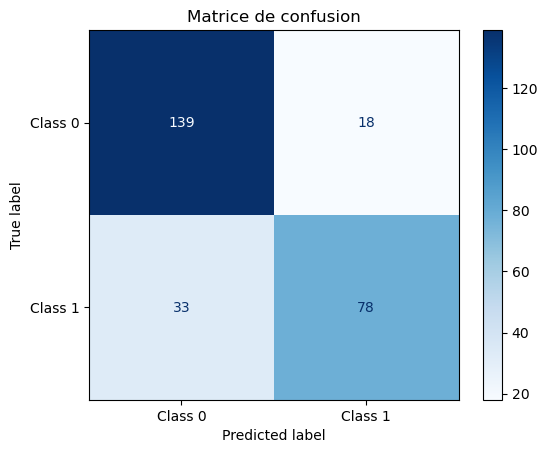

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matrice de confusion')
plt.show()


In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8097014925373134
Precision: 0.8125
Recall: 0.7027027027027027
F1 Score: 0.7536231884057971


**Courbe de precision-recall**

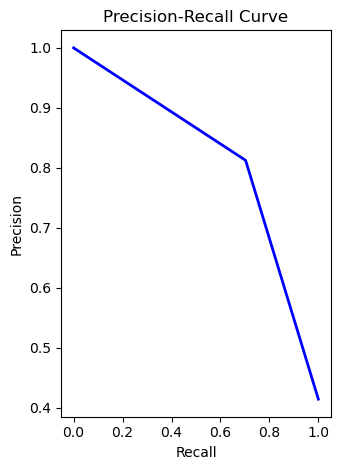

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()


**Courbe de ROC**

La courbe ROC représente le comportement de l'algorithme de classification à deux classes pour
tous les seuils de détection possibles. Plus la courbe a des valeurs élevées, moins le
modèle fait d’erreur. 
Pour quantifier globalement les performances du classifieur quel que soit le seuil, on calcule
l’AUC qui correspond à l’aire de la surface sous la courbe de ROC.

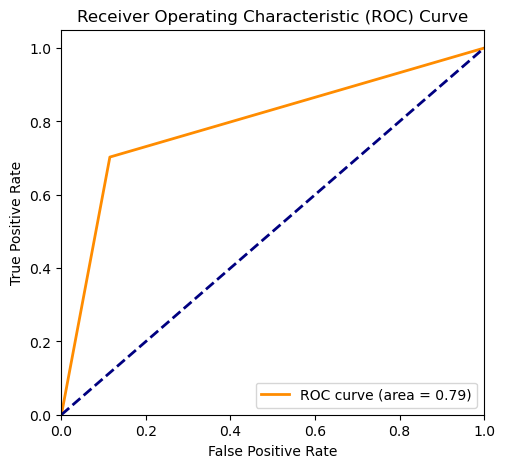

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Visualisation de l'arbre de décision

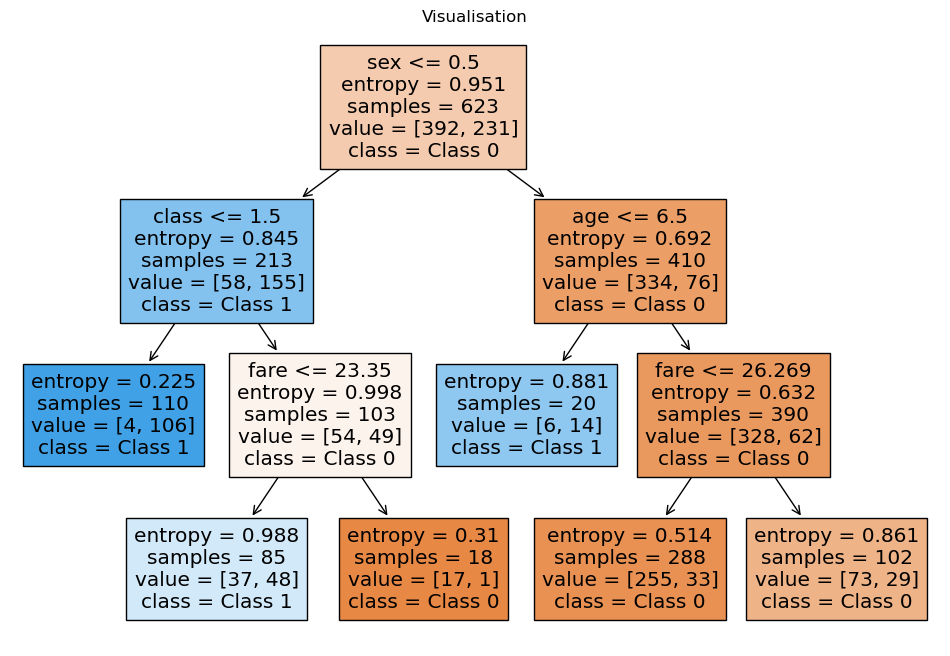

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title("Visualisation")
plt.show()
